In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data_clean/olympics_results.csv')
df.tail()

,Name,Country,Time,Place,Year
1701,Jie HE,CHN,2:22:31,67,2024
1702,Tariku NOVALES,ESP,2:25:50,68,2024
1703,Dario IVANOVSKI,MKD,2:28:15,69,2024
1704,Valentin BETOUDJI,CHA,2:32:11,70,2024
1705,Ser-Od BAT-OCHIR,MGL,2:42:33,71,2024


In [4]:
plt.style.use('seaborn-v0_8-whitegrid')

In [5]:
df['Time'] = pd.to_timedelta(df['Time'])
df['Time'] = df['Time'].dt.total_seconds() / 3600 # Converting to hours

In [30]:
# all athletes
x = df['Year'].to_numpy().reshape(-1, 1)
y = df['Time']

# only polish athletes
df_POL = df[df['Country'] == 'POL']
xpl = df_POL['Year']
ypl = df_POL['Time']

# only kenyan & ethiopian athletes
df_KENETH = df[(df['Country'] == 'KEN') | (df['Country'] == 'ETH')]
xke = df_KENETH['Year']
yke = df_KENETH['Time']

# only greek athletes
df_GRE = df[df['Country'] == 'GRE']
xgr = df_GRE['Year']
ygr = df_GRE['Time']

# only german athletes
df_GER = df[df['Country'] == 'GER']
xge = df_GER['Year']
yge = df_GER['Time']

In [34]:
x_reshaped = x.reshape(-1,1)
model = LinearRegression().fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

df_mean = df.groupby('Year')['Time'].mean()
df_median = df.groupby('Year')['Time'].median()

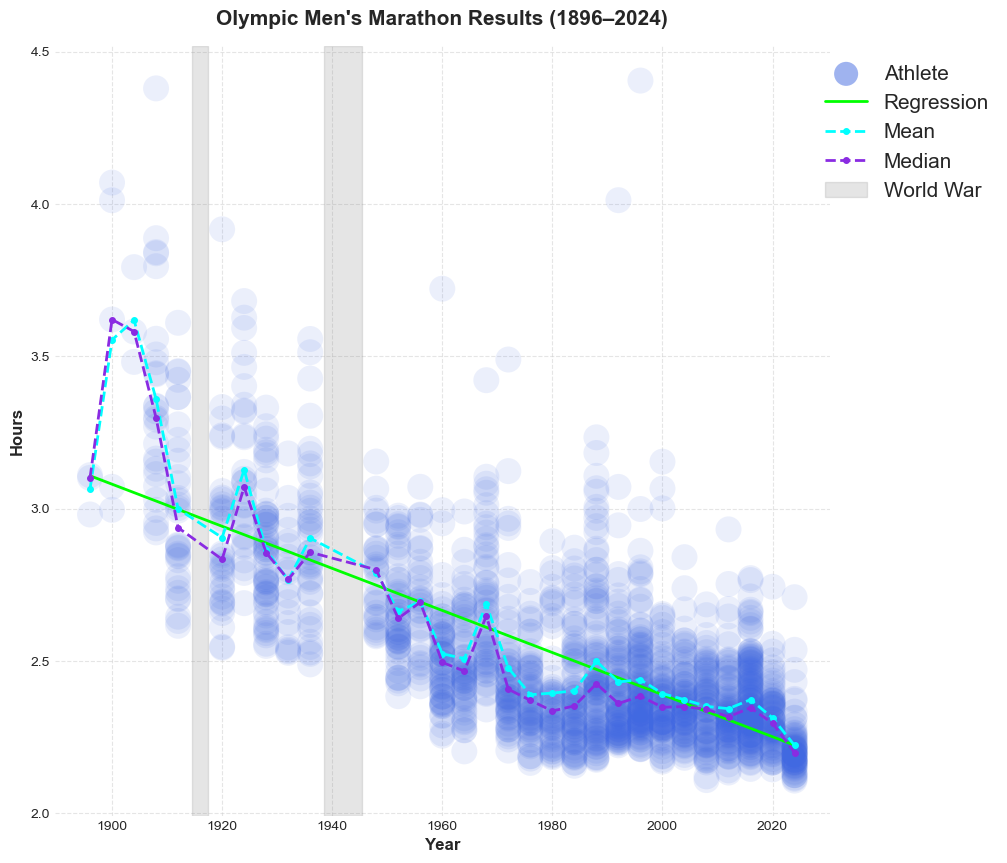

In [7]:
fig, ax = plt.subplots(figsize=(10,10)) 
# ALL ATHLETES
ax.scatter(x, y, s=350, alpha=0.1, color='royalblue', edgecolors='none')
ax.scatter([],[], s=300, alpha=.5, color='royalblue', label='Athlete', edgecolors='none')
# REGRESSION LINE
ax.plot(x, y_pred, color='lime', linestyle='-', linewidth=2, alpha=1, label='Regression')
# MEAN LINE
ax.plot(df.groupby('Year')['Time'].mean(), linestyle='--', linewidth=2, color='cyan', alpha=1, label='Mean', marker='o', markersize=4)
# MEDIAN LINE
ax.plot(df.groupby('Year')['Time'].median(), linestyle='--', linewidth=2, color='blueviolet', label='Median', marker='o', markersize=4)
# WORLD WARS GREY BARS
ax.axvspan(1914.5,1917.5, color='grey', alpha=0.2, label='World War')
ax.axvspan(1938.5,1945.5, color='grey', alpha=0.2)
# style
ax.set_title('Olympic Men\'s Marathon Results (1896–2024)', fontweight='bold', fontsize=15, pad=15)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_yticks(np.arange(2,5,0.5))
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Hours', fontweight='bold', fontsize=12)
ax.spines[['top','bottom','left','right']].set_visible(False)
ax.legend(bbox_to_anchor=(0.97,1), fontsize=15)

fig.savefig("charts/olympics.png", dpi=300, bbox_inches='tight')
plt.show()

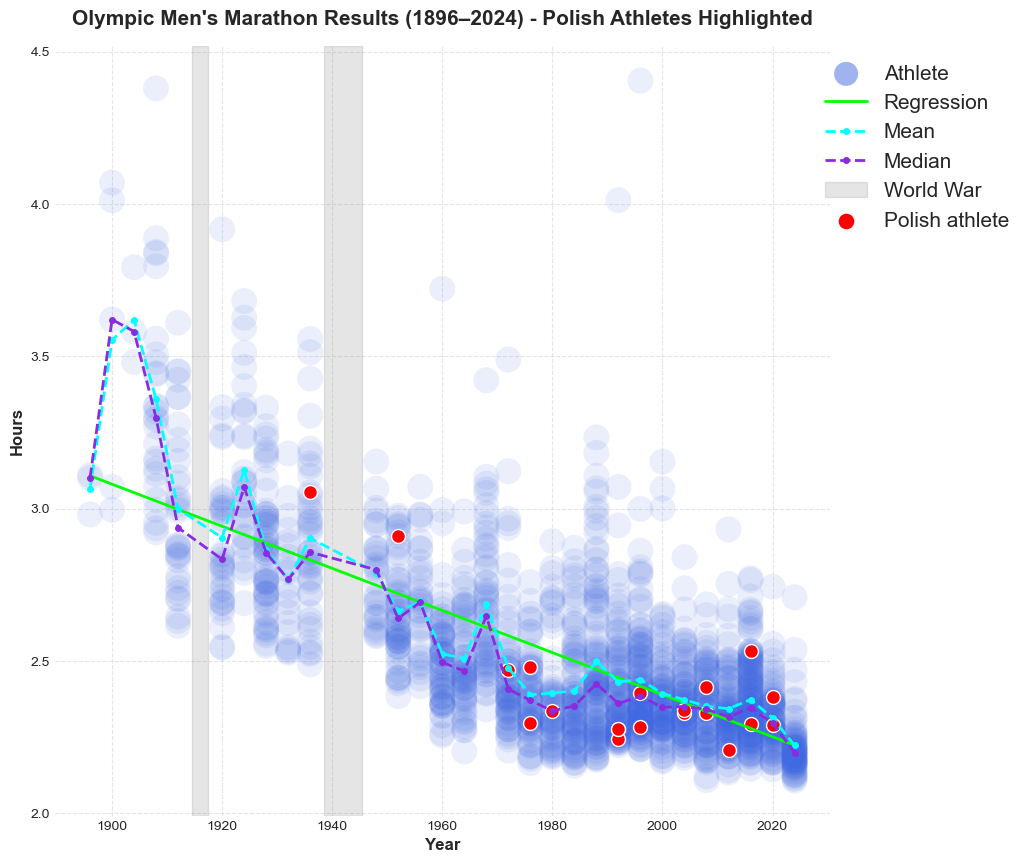

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) 
# ALL ATHLETES
ax.scatter(x, y, s=350, alpha=0.1, color='royalblue', edgecolors='none')
ax.scatter([],[], s=300, alpha=.5, color='royalblue', label='Athlete', edgecolors='none')
# REGRESSION LINE
ax.plot(x, y_pred, color='lime', linestyle='-', linewidth=2, alpha=1, label='Regression')
# MEAN LINE
ax.plot(df.groupby('Year')['Time'].mean(), linestyle='--', linewidth=2, color='cyan', alpha=1, label='Mean', marker='o', markersize=4)
# MEDIAN LINE
ax.plot(df.groupby('Year')['Time'].median(), linestyle='--', linewidth=2, color='blueviolet', label='Median', marker='o', markersize=4)
# WORLD WARS GREY BARS
ax.axvspan(1914.5,1917.5, color='grey', alpha=0.2, label='World War')
ax.axvspan(1938.5,1945.5, color='grey', alpha=0.2)

# WITH POLISH ATHLETES
ax.scatter(xpl, ypl, s=100, alpha=1, color='red', edgecolors='white')
ax.scatter([],[], s=150, alpha=1, color='red', label='Polish athlete', edgecolors='white')

# style
ax.set_title('Olympic Men\'s Marathon Results (1896–2024) - Polish Athletes Highlighted', fontweight='bold', fontsize=15, pad=15)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_yticks(np.arange(2,5,0.5))
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Hours', fontweight='bold', fontsize=12)
ax.spines[['top','bottom','left','right']].set_visible(False)
ax.legend(bbox_to_anchor=(0.97,1), fontsize=15)

fig.savefig("charts/olympics_PL.png", dpi=300, bbox_inches='tight')
plt.show()

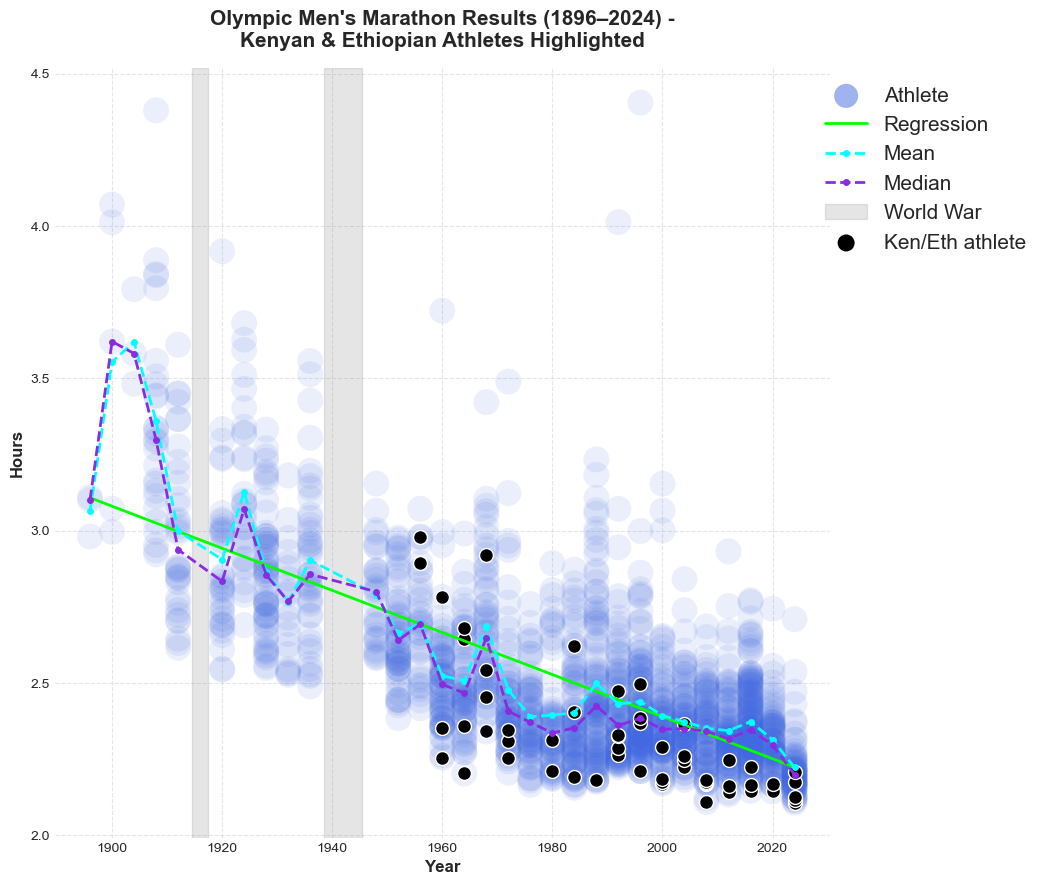

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
# ALL ATHLETES
ax.scatter(x, y, s=350, alpha=0.1, color='royalblue', edgecolors='none')
ax.scatter([],[], s=300, alpha=.5, color='royalblue', label='Athlete', edgecolors='none')
# REGRESSION LINE
ax.plot(x, y_pred, color='lime', linestyle='-', linewidth=2, alpha=1, label='Regression')
# MEAN LINE
ax.plot(df.groupby('Year')['Time'].mean(), linestyle='--', linewidth=2, color='cyan', alpha=1, label='Mean', marker='o', markersize=4)
# MEDIAN LINE
ax.plot(df.groupby('Year')['Time'].median(), linestyle='--', linewidth=2, color='blueviolet', label='Median', marker='o', markersize=4)
# WORLD WARS GREY BARS
ax.axvspan(1914.5,1917.5, color='grey', alpha=0.2, label='World War')
ax.axvspan(1938.5,1945.5, color='grey', alpha=0.2)

# WITH KENYAN & ETHIOPIAN
ax.scatter(xke, yke, s=100, alpha=1, color='black', edgecolors='white')
ax.scatter([],[], s=150, alpha=1, color='black', label='Ken/Eth athlete', edgecolors='none')

# style
ax.set_title('Olympic Men\'s Marathon Results (1896–2024) -\nKenyan & Ethiopian Athletes Highlighted', fontweight='bold', fontsize=15, pad=15)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_yticks(np.arange(2,5,0.5))
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Hours', fontweight='bold', fontsize=12)
ax.spines[['top','bottom','left','right']].set_visible(False)
ax.legend(bbox_to_anchor=(0.97,1), fontsize=15)

fig.savefig("charts/olympics_KEN_ETH.png", dpi=300, bbox_inches='tight')
plt.show()

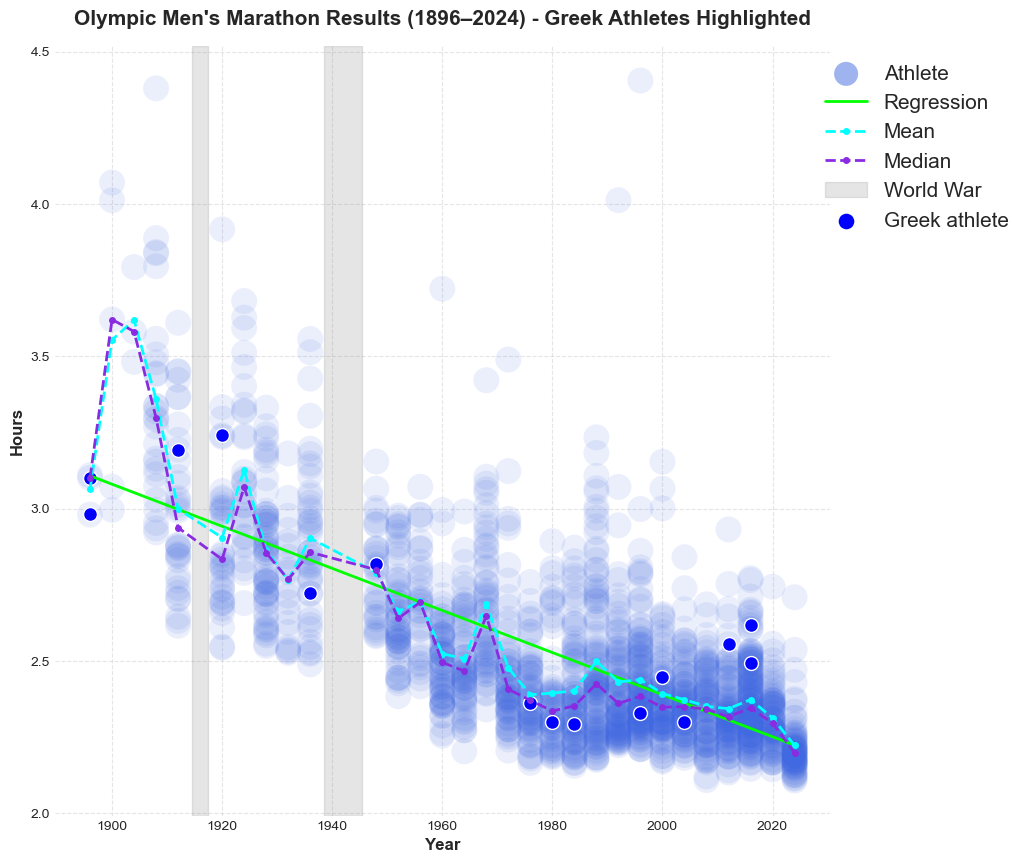

In [24]:
fig, ax = plt.subplots(figsize=(10,10)) 
# ALL ATHLETES
ax.scatter(x, y, s=350, alpha=0.1, color='royalblue', edgecolors='none')
ax.scatter([],[], s=300, alpha=.5, color='royalblue', label='Athlete', edgecolors='none')
# REGRESSION LINE
ax.plot(x, y_pred, color='lime', linestyle='-', linewidth=2, alpha=1, label='Regression')
# MEAN LINE
ax.plot(df.groupby('Year')['Time'].mean(), linestyle='--', linewidth=2, color='cyan', alpha=1, label='Mean', marker='o', markersize=4)
# MEDIAN LINE
ax.plot(df.groupby('Year')['Time'].median(), linestyle='--', linewidth=2, color='blueviolet', label='Median', marker='o', markersize=4)
# WORLD WARS GREY BARS
ax.axvspan(1914.5,1917.5, color='grey', alpha=0.2, label='World War')
ax.axvspan(1938.5,1945.5, color='grey', alpha=0.2)

# WITH GREEK ATHLETES
ax.scatter(xgr, ygr, s=100, alpha=1, color='blue', edgecolors='white')
ax.scatter([],[], s=150, alpha=1, color='blue', label='Greek athlete', edgecolors='white')

# style
ax.set_title('Olympic Men\'s Marathon Results (1896–2024) - Greek Athletes Highlighted', fontweight='bold', fontsize=15, pad=15)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_yticks(np.arange(2,5,0.5))
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Hours', fontweight='bold', fontsize=12)
ax.spines[['top','bottom','left','right']].set_visible(False)
ax.legend(bbox_to_anchor=(0.97,1), fontsize=15)

fig.savefig("charts/olympics_GRE.png", dpi=300, bbox_inches='tight')
plt.show()

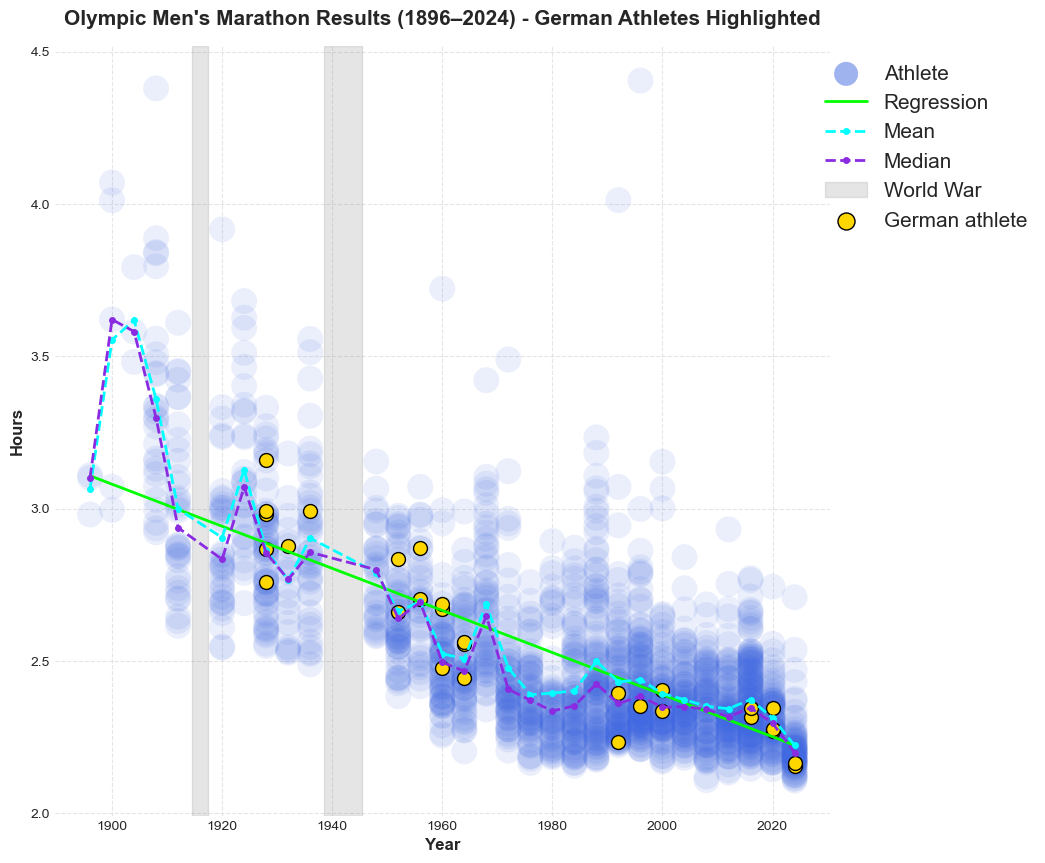

In [36]:
fig, ax = plt.subplots(figsize=(10,10)) 
# ALL ATHLETES
ax.scatter(x, y, s=350, alpha=0.1, color='royalblue', edgecolors='none')
ax.scatter([],[], s=300, alpha=.5, color='royalblue', label='Athlete', edgecolors='none')
# REGRESSION LINE
ax.plot(x, y_pred, color='lime', linestyle='-', linewidth=2, alpha=1, label='Regression')
# MEAN LINE
ax.plot(df.groupby('Year')['Time'].mean(), linestyle='--', linewidth=2, color='cyan', alpha=1, label='Mean', marker='o', markersize=4)
# MEDIAN LINE
ax.plot(df.groupby('Year')['Time'].median(), linestyle='--', linewidth=2, color='blueviolet', label='Median', marker='o', markersize=4)
# WORLD WARS GREY BARS
ax.axvspan(1914.5,1917.5, color='grey', alpha=0.2, label='World War')
ax.axvspan(1938.5,1945.5, color='grey', alpha=0.2)

# WITH GERMAN ATHLETES
ax.scatter(xge, yge, s=100, alpha=1, color='gold', edgecolors='black')
ax.scatter([],[], s=150, alpha=1, color='gold', label='German athlete', edgecolors='black')

# style
ax.set_title('Olympic Men\'s Marathon Results (1896–2024) - German Athletes Highlighted', fontweight='bold', fontsize=15, pad=15)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_yticks(np.arange(2,5,0.5))
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Hours', fontweight='bold', fontsize=12)
ax.spines[['top','bottom','left','right']].set_visible(False)
ax.legend(bbox_to_anchor=(0.97,1), fontsize=15)

fig.savefig("charts/olympics_GER.png", dpi=300, bbox_inches='tight')
plt.show()